In [5]:
# Import the necessary libraries
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from scipy.signal import medfilt

def analisis_espectral(archivo_wav, inicio_segundo, fin_segundo, index, name):
    # Read a certain fragment of the song file
    tasa_muestreo, datos = wav.read(archivo_wav)
    inicio_muestras = int(inicio_segundo * tasa_muestreo)
    fin_muestras = int(fin_segundo * tasa_muestreo)
    datos = datos[inicio_muestras:fin_muestras]
    
    # Apply a median filter to reduce noise in the data
    datos_filtrados = medfilt(datos, kernel_size=3)
    
    # Obtain the magnitude of the Fourier Transform
    transformada_fourier = np.fft.fft(datos_filtrados, norm='forward')
    magnitud = np.abs(transformada_fourier)
    
    # Calculate the corresponding frequencies
    n = len(datos)
    frecuencias = np.linspace(0.0, tasa_muestreo / 2, n // 2)

    # Plot spectral analysis
    plt.subplot(1, 2, index+1)
    plt.plot(frecuencias, 2.0/n * magnitud[:n//2], color='deeppink')
    plt.title(f'{name}', fontstyle='italic')
    plt.xlabel('Frecuencia (Hz)', fontstyle='italic')
    plt.ylabel('Amplitud', fontstyle='italic')
    plt.grid(True, linestyle='--', alpha=0.6)
    


/Users/sbaca/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/signaltools.py:1531: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '
/Users/sbaca/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/signaltools.py:1531: UserWarning: kernel_size exceeds volume extent: the volume will be zero-padded.
  warnings.warn('kernel_size exceeds volume extent: the volume will be '


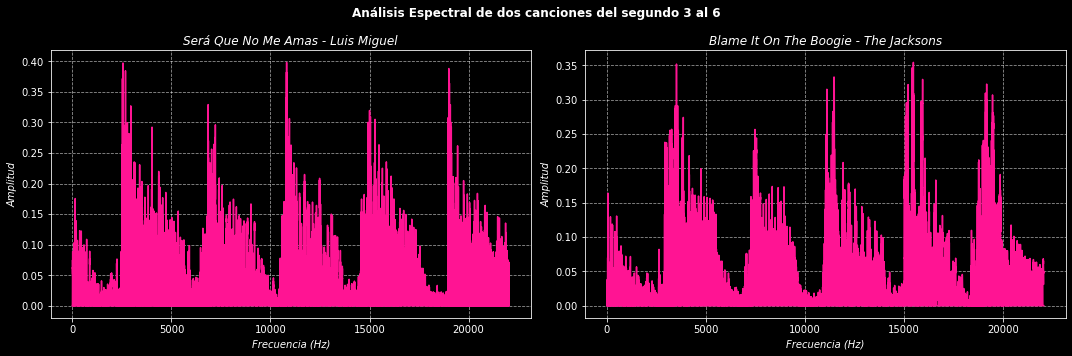

In [7]:
# List with file names and song titles
labels = [["Sera_Que_No_Me_Amas.wav" ,"The_Jacksons_Blame_It_On_the_Boogie.wav" ], ["Será Que No Me Amas - Luis Miguel", "Blame It On The Boogie - The Jacksons"]]

# Fragment of both songs to analyze
inicio_segundo, fin_segundo = 3, 6

# Graph spectral analysis of songs
plt.figure(figsize=(15, 5))
for i in range(len(labels)):
    analisis_espectral(labels[0][i], inicio_segundo, fin_segundo, i, labels[1][i])  
plt.suptitle(f'Análisis Espectral de dos canciones del segundo {inicio_segundo} al {fin_segundo}', fontweight='bold')
plt.tight_layout()
plt.style.use('dark_background')
plt.show()